![zad1.png](images/note2/zad1.png)

In [ ]:
# Zadanie w pdfie (images/note2/solutions)

![zad3_1.png](images/note2/zad3_1.png)
![zad3_2.png](images/note2/zad3_2.png)

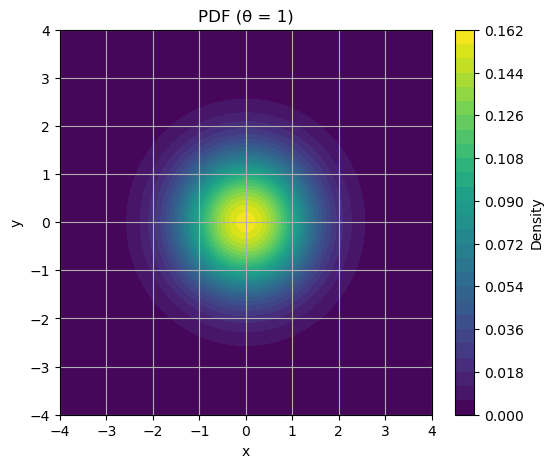

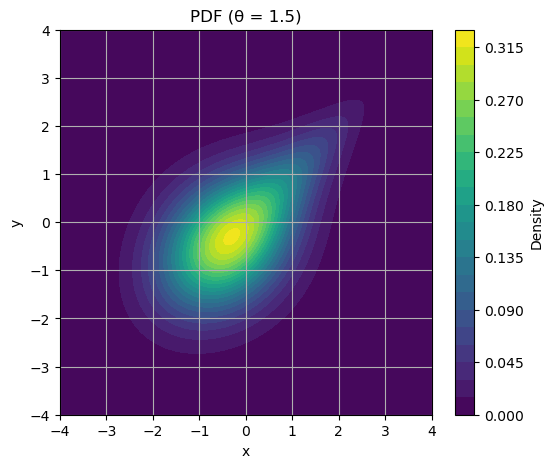

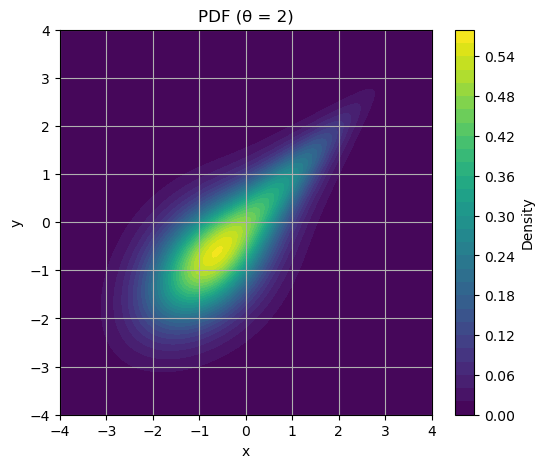

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def gumble_copula_pdf(u, v, t):
    rev_u = -np.log(u)
    rev_v= -np.log(v)
    val = (rev_u**t + rev_v**t)**(1/t)
    cdf_gumbel = np.exp(-(val))
    num = (rev_u * rev_v)**(t-1) * ((t - 1) + val**t)
    return cdf_gumbel * t * num / (u * v * val**(2*t - 1))

x = np.linspace(-4, 4, 1000)
y = np.linspace(-4, 4, 1000)
thetas = [1, 1.5, 2]
X, Y = np.meshgrid(x, y)

u = norm.cdf(X)
v = norm.cdf(Y)

pdf_X = norm.pdf(X)
pdf_Y = norm.pdf(Y)

for theta in thetas:
    gcp = gumble_copula_pdf(u, v, theta)
    pdf_gc = gcp * pdf_X * pdf_Y
    plt.figure(figsize=(6, 5))
    plt.contourf(X, Y, pdf_gc, levels=30, cmap='viridis')
    plt.title(f'PDF (θ = {theta})')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.colorbar(label="Density")
    plt.grid(True)

plt.show()